In [628]:
import pandas as pd
import numpy  as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid')

from sklearn.impute import SimpleImputer

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [645]:
plt.rcParams['figure.figsize'] = (15,8)

### Feature Engineering

In [601]:
test = pd.read_csv('test_clean.csv')
train = pd.read_csv('train_clean.csv')
xtrain = train.drop('SalePrice',axis=1)
ytrain = train.SalePrice
xtest = test.drop(['Id','SalePrice'],axis=1)
ytest = test[['Id','SalePrice']]

In [602]:
xtrain['sold_built'] = xtrain.YrSold - xtrain.YearBuilt
xtrain['sold_remod'] = xtrain.YrSold - xtrain.YearRemodAdd
xtrain = xtrain.drop(['YrSold','YearBuilt','YearRemodAdd'],axis=1)

In [603]:
xtest['sold_built'] = xtest.YrSold - xtest.YearBuilt
xtest['sold_remod'] = xtest.YrSold - xtest.YearRemodAdd
xtest = xtest.drop(['YrSold','YearBuilt','YearRemodAdd'],axis=1)

In [606]:
df_num = xtrain.select_dtypes(include=['int64','float64'])
df_cat = xtrain.select_dtypes('object')

In [614]:
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'sold_built',
       'sold_remod'],
      dtype='object')

In [618]:
xtrain['BsmtFinSF2'].median()

0.0

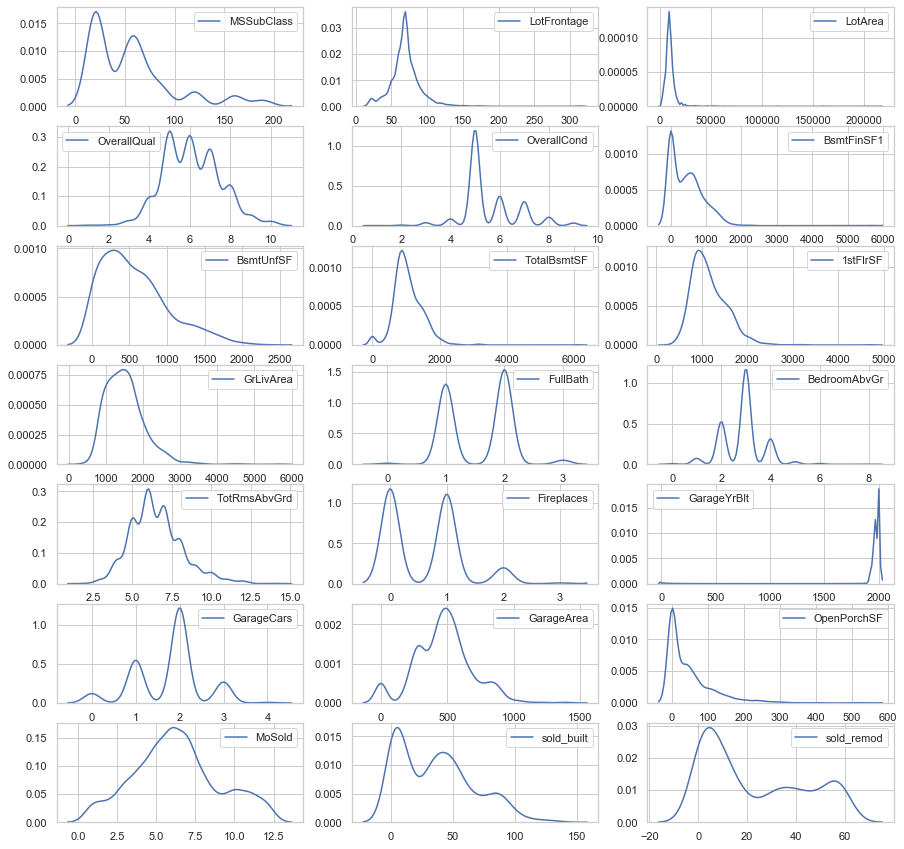

In [626]:
std_0 = []
std_not_0 = []
j=1
plt.figure(figsize=(15,15))
for i in df_num.columns:
    std_not_0.append(i)
    if xtrain[i].std() > 0.5 and xtrain[i].median() > 0.5:
        plt.subplot(7,3,j)
        sns.kdeplot(xtrain[i])
        j+=1
        #plt.show()
    else:
        std_0.append(i)

In [ ]:
sns.scatterplot()

## Machine Learning Modelling


1. Dummy Model

In [310]:
df.shape

(2918, 290)

In [321]:
df = pd.concat((xtrain,xtest),axis=0)
df = pd.get_dummies(df,drop_first=True)
xtrain_enc = df.iloc[np.arange(0,1459),:]
xtest_enc = df.iloc[np.arange(1459,2918),:]

lr = LinearRegression().fit(xtrain_enc,ytrain)
ypred = lr.predict(xtest_enc)

In [327]:
lr.coef_

array([-4.04933075e+01,  5.34916277e+01,  7.35401586e-01,  6.81543714e+03,
        5.76587484e+03,  3.23701837e+02,  1.02655595e+02,  1.97900520e+01,
        1.67185231e+01,  7.37013111e+00, -1.83455724e+00,  2.22542451e+01,
        1.55283574e+01,  3.57274299e+01, -2.04626011e+01,  3.07920389e+01,
        9.33024538e+02, -1.16440198e+02,  3.63737277e+03,  1.37154606e+03,
       -3.61960559e+03, -1.34475261e+04,  1.23455843e+03,  5.97296356e+03,
       -2.48813864e+01,  4.05850486e+03,  1.78226644e+01,  1.56593175e+01,
        3.57640599e+00,  5.31534205e+00,  3.15732012e+01,  2.75996443e+01,
        9.11154605e+01, -6.53963247e-02, -4.41403038e+02, -4.75404349e+02,
        3.37906812e+04,  2.42241567e+04,  2.69873023e+04,  2.32841556e+04,
        3.21874581e+04,  4.24888542e+03,  5.32351397e+03,  1.72517041e+03,
        7.54593765e+03, -1.07143984e+04,  5.56792250e+03, -3.22789784e+04,
        8.82575550e+03, -7.49944677e+03, -1.68894313e+04, -1.40201962e+03,
        7.08799656e+03, -

In [328]:
# As we can see the coefficients are high in magnitude hence we can conclude that our model is Overfitted.

In [330]:
sample1 = pd.DataFrame({'Id':test.Id,'SalePrice':ypred})

sample1.to_csv('submission.csv_v01',index=False)

In [491]:
print('RMSE for dummy model is:' ,round(np.sqrt(mean_squared_error(ytest.SalePrice,ypred)),3))

RMSE for dummy model is: 76610.561


2. Using OLS modelfor assumption check

In [342]:
ols_mod = sm.OLS(ytrain,xtrain_enc).fit()
print(ols_mod.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              450.5
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:16:52   Log-Likelihood:                         -16574.
No. Observations:                1459   AIC:                                  3.363e+04
Df Residuals:                    1217   BIC:                                  3.491e+04
Df Model:                         242                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [345]:
ols_resid = ols_mod.resid

#### Assumptions Check

1. Multicollinearity

In [386]:
vif = [variance_inflation_factor(xtrain_enc.values,i) for i in range(xtrain_enc.shape[1])]
vif_df= pd.DataFrame({'vif':vif},index=xtrain_enc.columns).sort_values('vif',ascending=False)
vif_df.head(20).index

Index(['GarageQual_None', 'TotalBsmtSF', 'GarageFinish_None',
       'BsmtFinType1_None', 'BsmtCond_None', 'Exterior1st_CBlock',
       'GarageCond_None', 'GrLivArea', 'LowQualFinSF', 'GarageType_None',
       '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1',
       'BsmtQual_None', 'Exterior2nd_CBlock', 'YrSold', 'YearBuilt',
       'GarageYrBlt'],
      dtype='object')

In [388]:
v1=xtrain_enc.drop(['GarageQual_None', 'TotalBsmtSF', 'GarageFinish_None',
       'BsmtFinType1_None', 'BsmtCond_None', 'Exterior1st_CBlock',
       'GarageCond_None', 'GrLivArea', 'LowQualFinSF', 'GarageType_None',
       '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1',
       'BsmtQual_None', 'Exterior2nd_CBlock'],axis=1)

In [390]:
vif1 = [variance_inflation_factor(v1.values,i) for i in range(v1.shape[1])]
vif_df= pd.DataFrame({'vif':vif1},index=v1.columns).sort_values('vif',ascending=False)
vif_df.head(20).index

Index(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageCond_TA',
       'RoofMatl_CompShg', 'GarageQual_TA', 'Heating_GasA', 'Condition2_Norm',
       'GarageYrBlt', 'RoofStyle_Gable', 'ExterCond_TA', 'Street_Pave',
       'MSZoning_RL', 'GarageType_Attchd', 'RoofStyle_Hip',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'Functional_Typ',
       'OverallQual', 'KitchenAbvGr'],
      dtype='object')

In [391]:
vif_df.head(20)

,vif
YrSold,92633.353219
YearBuilt,58964.746165
YearRemodAdd,32762.809715
GarageCond_TA,2963.653055
RoofMatl_CompShg,2478.504151
GarageQual_TA,2194.507704
Heating_GasA,1804.852466
Condition2_Norm,1139.420728
GarageYrBlt,1131.644641
RoofStyle_Gable,738.890525


In [392]:
v2 = v1.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageCond_TA',
       'RoofMatl_CompShg', 'GarageQual_TA', 'Heating_GasA', 'Condition2_Norm',
       'GarageYrBlt', 'RoofStyle_Gable', 'ExterCond_TA', 'Street_Pave',
       'MSZoning_RL', 'GarageType_Attchd', 'RoofStyle_Hip',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd'],axis=1)

In [393]:
vif2 = [variance_inflation_factor(v2.values,i) for i in range(v2.shape[1])]
vif_df= pd.DataFrame({'vif':vif2},index=v2.columns).sort_values('vif',ascending=False)
vif_df.head(20).index

Index(['Functional_Typ', 'OverallQual', 'MSSubClass', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'BsmtFinType2_Unf', 'MasVnrType_None', 'SaleType_New',
       'SaleCondition_Partial', 'OverallCond', 'FireplaceQu_None',
       'GarageCars', 'ExterQual_TA', 'Exterior1st_MetalSd',
       'Exterior2nd_MetalSd', 'BedroomAbvGr', 'BsmtCond_TA', 'SaleType_WD',
       'GarageArea', 'MasVnrType_BrkFace'],
      dtype='object')

In [394]:
vif_df.head(20)

,vif
Functional_Typ,122.703088
OverallQual,94.089735
MSSubClass,92.479008
KitchenAbvGr,91.646766
TotRmsAbvGrd,82.550923
BsmtFinType2_Unf,78.609784
MasVnrType_None,73.815895
SaleType_New,55.571629
SaleCondition_Partial,53.184055
OverallCond,52.895170


In [395]:
v3 = v2.drop(['Functional_Typ', 'OverallQual', 'MSSubClass', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'BsmtFinType2_Unf', 'MasVnrType_None', 'SaleType_New',
       'SaleCondition_Partial', 'OverallCond', 'FireplaceQu_None',
       'GarageCars', 'ExterQual_TA', 'Exterior1st_MetalSd',
       'Exterior2nd_MetalSd', 'BedroomAbvGr', 'BsmtCond_TA', 'SaleType_WD',
       'GarageArea', 'MasVnrType_BrkFace'],axis=1)
vif3 = [variance_inflation_factor(v3.values,i) for i in range(v3.shape[1])]
vif_df= pd.DataFrame({'vif':vif3},index=v3.columns).sort_values('vif',ascending=False)
vif_df.head(20).index

Index(['Condition1_Norm', 'CentralAir_Y', 'LandContour_Lvl',
       'Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 'PavedDrive_Y',
       'Fence_NoFence', 'FullBath', 'LotFrontage', 'BsmtExposure_None',
       'Electrical_SBrkr', 'BsmtFinType2_None', 'Neighborhood_NAmes',
       'BsmtQual_TA', 'KitchenQual_TA', 'Exterior1st_HdBoard',
       'Exterior2nd_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng',
       'Foundation_PConc'],
      dtype='object')

In [396]:
vif_df.head(20)

,vif
Condition1_Norm,34.779134
CentralAir_Y,33.421865
LandContour_Lvl,30.817730
Exterior1st_CemntBd,28.086632
Exterior2nd_CmentBd,27.953967
PavedDrive_Y,26.439134
Fence_NoFence,26.081302
FullBath,24.502936
LotFrontage,23.426957
BsmtExposure_None,21.112145


In [397]:
v4 = v3.drop(['Condition1_Norm', 'CentralAir_Y', 'LandContour_Lvl',
       'Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 'PavedDrive_Y',
       'Fence_NoFence', 'FullBath', 'LotFrontage', 'BsmtExposure_None',
       'Electrical_SBrkr', 'BsmtFinType2_None', 'Neighborhood_NAmes',
       'BsmtQual_TA', 'KitchenQual_TA', 'Exterior1st_HdBoard',
       'Exterior2nd_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng',
       'Foundation_PConc'],axis=1)
vif4 = [variance_inflation_factor(v4.values,i) for i in range(v4.shape[1])]
vif_df= pd.DataFrame({'vif':vif4},index=v4.columns).sort_values('vif',ascending=False)
vif_df.head(20).index

Index(['Fireplaces', 'SaleCondition_Normal', 'HouseStyle_1Story',
       'BsmtExposure_No', 'MoSold', 'Neighborhood_Somerst',
       'HouseStyle_2Story', 'LotArea', 'FireplaceQu_Gd', 'LotConfig_Inside',
       'FireplaceQu_TA', 'MSZoning_FV', 'GarageFinish_Unf',
       'Foundation_CBlock', 'MSZoning_RM', 'BsmtFinType1_GLQ', 'BsmtQual_Gd',
       'BsmtFinType1_Unf', 'Neighborhood_OldTown', 'LotShape_Reg'],
      dtype='object')

In [398]:
vif_df.head(20)

,vif
Fireplaces,10.171435
SaleCondition_Normal,7.844738
HouseStyle_1Story,7.032230
BsmtExposure_No,6.975691
MoSold,6.877035
Neighborhood_Somerst,6.294383
HouseStyle_2Story,5.881052
LotArea,5.804510
FireplaceQu_Gd,5.757450
LotConfig_Inside,5.603928


In [399]:
v5 = v4.drop(['Fireplaces', 'SaleCondition_Normal', 'HouseStyle_1Story',
       'BsmtExposure_No', 'MoSold', 'Neighborhood_Somerst',
       'HouseStyle_2Story'],axis=1)
vif5 = [variance_inflation_factor(v5.values,i) for i in range(v5.shape[1])]
vif_df= pd.DataFrame({'vif':vif5},index=v5.columns).sort_values('vif',ascending=False)
vif_df.head(20).index

Index(['LotArea', 'LotConfig_Inside', 'GarageFinish_Unf', 'MSZoning_RM',
       'Foundation_CBlock', 'BsmtQual_Gd', 'BsmtFinType1_GLQ',
       'Neighborhood_OldTown', 'ExterQual_Gd', 'LotShape_Reg',
       'BsmtFinType1_Unf', 'Exterior1st_Plywood', 'Exterior2nd_Plywood',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_Stucco', 'Electrical_Mix',
       'KitchenQual_Gd', 'RoofStyle_Shed', 'Exterior1st_Stucco',
       'BsmtFullBath'],
      dtype='object')

In [400]:
vif_df.head(20)

,vif
LotArea,5.603090
LotConfig_Inside,5.266275
GarageFinish_Unf,4.768400
MSZoning_RM,4.364079
Foundation_CBlock,4.290870
BsmtQual_Gd,4.220769
BsmtFinType1_GLQ,4.158213
Neighborhood_OldTown,4.045606
ExterQual_Gd,4.019397
LotShape_Reg,3.972264


In [401]:
v6 = v5.drop(['LotArea', 'LotConfig_Inside'],axis=1)
vif6 = [variance_inflation_factor(v6.values,i) for i in range(v6.shape[1])]
vif_df= pd.DataFrame({'vif':vif6},index=v6.columns).sort_values('vif',ascending=False)
vif_df.head(20).index

Index(['GarageFinish_Unf', 'MSZoning_RM', 'BsmtQual_Gd', 'Foundation_CBlock',
       'Neighborhood_OldTown', 'BsmtFinType1_GLQ', 'ExterQual_Gd',
       'LotShape_Reg', 'BsmtFinType1_Unf', 'Exterior1st_Plywood',
       'Exterior2nd_Plywood', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Stucco',
       'KitchenQual_Gd', 'Electrical_Mix', 'Exterior1st_Stucco',
       'BsmtFullBath', 'RoofStyle_Shed', 'GarageType_Detchd', 'GarageQual_Po'],
      dtype='object')

In [402]:
vif_df.head(20)

,vif
GarageFinish_Unf,4.726906
MSZoning_RM,4.363782
BsmtQual_Gd,4.179990
Foundation_CBlock,4.103510
Neighborhood_OldTown,4.030904
BsmtFinType1_GLQ,4.030742
ExterQual_Gd,4.007700
LotShape_Reg,3.772368
BsmtFinType1_Unf,3.738812
Exterior1st_Plywood,3.712720


In [406]:
lr1 = LinearRegression().fit(xtrain_enc[vif_df.index],ytrain)
lr1_pred = lr1.predict(xtest_enc[vif_df.index])

In [450]:
print('RMSE after vif reduction:',round(np.sqrt(mean_squared_error(ytest.SalePrice,lr1_pred)),2))

RMSE after vif reduction: 72653.75


In [409]:
ols1 = sm.OLS(ytrain,xtrain_enc[vif_df.index]).fit()
print(ols1.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              143.3
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                        0.00
Time:                        16:43:00   Log-Likelihood:                         -17694.
No. Observations:                1459   AIC:                                  3.572e+04
Df Residuals:                    1292   BIC:                                  3.660e+04
Df Model:                         167                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [410]:
# As we can see by removing multiple colyumns the rmse has decreased also the R2 and adjusted R2 has increased.

In [411]:
ols1_resid = ols1.resid

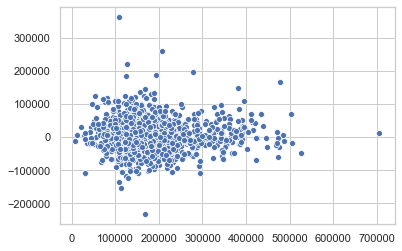

In [414]:
sns.scatterplot(ypred,ols1_resid)
plt.show()

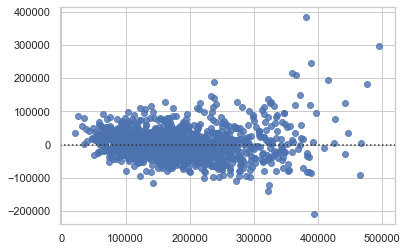

In [415]:
sns.residplot(ols1.fittedvalues,ols1_resid)
plt.show()

In [416]:
ols1.resid.skew()

0.7383461375238933

In [426]:
xtrain_enc[vif_df.index].select_dtypes('int64').describe()

,HalfBath,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,ScreenPorch,PoolArea,3SsnPorch
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.382454,94.240576,46.692255,21.969157,43.518849,15.071282,2.760795,3.411926
std,0.502798,125.381679,66.267472,61.137400,496.291826,55.775138,40.191018,29.327247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,857.000000,547.000000,552.000000,15500.000000,480.000000,738.000000,508.000000


3. Lasso Model

In [440]:
las = Lasso().fit(xtrain_enc[vif_df.index],ytrain)
las_pred = las.predict(xtest_enc[vif_df.index])

In [446]:
las.coef_

array([-8.12268539e+03,  5.52806987e+03, -1.38276285e+04, -1.64251024e+04,
       -2.72138032e+04,  1.91407267e+04,  1.07995824e+04,  8.57358052e+02,
        1.52374721e+03,  8.68466344e+03, -7.39062482e+03,  1.63317238e+02,
       -2.74118172e+04, -3.88522410e+03,  8.52321760e+04,  1.88674301e+04,
        4.72105695e+03,  4.24993430e+03, -2.98591375e+03, -1.40004130e+04,
        1.87027111e+03, -1.88414371e+04, -6.52130091e+04,  6.37250112e+04,
        1.01824567e+04, -9.90857374e+03,  1.68363557e+04,  1.00062178e+04,
        3.61113136e+04,  1.54421820e+04,  2.26464175e+04, -1.53703713e+04,
        6.24006786e+01, -1.47161036e+04,  5.05089306e+01,  7.55706081e+01,
        1.84955035e+04, -2.14068295e+04, -6.14053529e+04, -4.57660113e+04,
       -7.45066197e+02, -3.68035771e+03,  8.69188613e+04, -1.22798670e+04,
       -5.12881881e+04, -1.33300351e+04, -1.72008651e+04,  7.87032860e+04,
        2.41201997e+03,  1.60226242e+03,  3.78854892e+04, -1.07372071e+03,
       -1.23715277e+03, -

In [449]:
print('RMSE for Lasso:',round(np.sqrt(mean_squared_error(ytest.SalePrice,las_pred)),2))

RMSE for Lasso: 72574.69


In [486]:
params = {'alpha':np.arange(110,120,0.01)}
las_grid = GridSearchCV(estimator=las,param_grid=params,cv=5,n_jobs=-1).fit(xtrain_enc[vif_df.index],ytrain)

In [487]:
las_grid.best_params_

{'alpha': 117.31000000000374}

In [488]:
tuned_las = Lasso(alpha=117.31).fit(xtest_enc[vif_df.index],ytrain)
tun_las_pred = tuned_las.predict(xtest_enc[vif_df.index])

In [519]:
las_coef = pd.DataFrame({'Feature':vif_df.index,'Coeff':tuned_las.coef_,'abs_coef':abs(tuned_las.coef_)}).sort_values('abs_coef',ascending=True)
las_coef[las_coef.abs_coef != 0.0].Feature.values

array(['MiscVal', 'PoolArea', 'WoodDeckSF', 'MasVnrArea', 'ScreenPorch',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Neighborhood_Sawyer',
       'Neighborhood_NWAmes', 'ExterQual_Fa', 'MasVnrType_Stone',
       'Foundation_CBlock', 'Exterior2nd_Plywood', 'FireplaceQu_Po',
       'Exterior1st_Plywood', 'MSZoning_FV', 'Neighborhood_Timber',
       'GarageFinish_RFn', 'GarageType_Detchd', 'BsmtFinType1_Unf',
       'LandSlope_Mod', 'LandContour_HLS', 'BsmtFinType2_LwQ',
       'HeatingQC_Gd', 'GarageType_BuiltIn', 'Neighborhood_NoRidge',
       'BsmtFinType1_GLQ', 'BsmtQual_Fa', 'LotShape_Reg',
       'Neighborhood_Veenker', 'GarageFinish_Unf', 'BsmtFullBath',
       'GarageType_Basment', 'Neighborhood_Edwards', 'Condition1_Feedr',
       'Fence_MnPrv', 'Neighborhood_Crawfor', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Neighborhood_IDOTRR', 'ExterCond_Gd',
       'KitchenQual_Gd', 'BsmtHalfBath', 'Neighborhood_OldTown',
       'Exterior1st_BrkFace', 'BsmtQual_Gd', 'BsmtExpo

In [513]:
print('RMSE of Lasso Tuned Model:',round(np.sqrt(mean_squared_error(ytest.SalePrice,tun_las_pred)),2))

RMSE of Lasso Tuned Model: 23085.12


In [492]:
sample2 = pd.DataFrame({'Id':test.Id,'SalePrice':tun_las_pred})
sample2.to_csv('submission_lasso.csv',index=False)

4. Decision Tree Regressor

In [582]:
dtr = DecisionTreeRegressor()
params = {'criterion':['mse','friedman_mse'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'max_leaf_nodes':[1,2,3,4,5],
    'min_impurity_decrease':[0.0,0.1,0.5,0.7],
    'min_impurity_split':[0.0,0.1,0.5,0.7],
    'ccp_alpha':[0.0,0.1,0.3,0.7,0.9]}

In [584]:
dtr_grid = RandomizedSearchCV(estimator=dtr,param_distributions=params,cv=5,n_jobs=-1).fit(xtrain_enc,ytrain)
dtr_grid.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 4,
 'min_impurity_split': 0.7,
 'min_impurity_decrease': 0.7,
 'max_leaf_nodes': 5,
 'max_depth': 4,
 'criterion': 'mse',
 'ccp_alpha': 0.7}

In [585]:
dtr_grid1 = GridSearchCV(estimator=dtr,param_grid=params,cv=5,n_jobs=-1).fit(xtrain_enc,ytrain)
dtr_grid1.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 3,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [586]:
tun_dt = DecisionTreeRegressor(ccp_alpha= 0.0,
 criterion='mse',
 max_depth= 3,
 max_leaf_nodes= 5,
 min_impurity_decrease= 0.0,
 min_impurity_split= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2).fit(xtrain_enc,ytrain)

In [588]:
tun_dt_pred = tun_dt.predict(xtest_enc)

In [590]:
print('RMSE of Decision Tree Tuned Model:',round(np.sqrt(mean_squared_error(ytest.SalePrice,tun_dt_pred)),2))

RMSE of Decision Tree Tuned Model: 68408.47


5. Random Forest Regressor

In [533]:
feat = las_coef[las_coef.abs_coef != 0.0].Feature.values

In [535]:
rfg = RandomForestRegressor().fit(xtrain_enc[feat],ytrain)

In [537]:
rfg_pred = rfg.predict(xtest_enc[feat])

In [538]:
print('RMSE of Random Forest Model:',round(np.sqrt(mean_squared_error(ytest.SalePrice,rfg_pred)),2))

RMSE of Random Forest Model: 65985.85


In [560]:
rfg =RandomForestRegressor()
params = {'n_estimators':[10,50,80,90,100,150,200],
    'max_depth':[1,2,3,4,5,6],
    'min_samples_split':[1,2,3,4,5,6],
    'min_samples_leaf':[1,2,3,4,5,6],
    'max_leaf_nodes':[1,2,3,4,5,6],
    'ccp_alpha':[0.1,0.3,0.5,0.7,1]}
rfg_grid = RandomizedSearchCV(estimator=rfg,param_distributions=params,cv=10,n_jobs=-1).fit(xtrain_enc[feat],ytrain)

In [567]:
asd =rfg_grid.predict(xtest_enc[feat])

In [561]:
rfg_grid.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 5,
 'max_depth': 4,
 'ccp_alpha': 0.7}

In [562]:
rfg_tuned = RandomForestRegressor(n_estimators=50,  min_samples_split= 6,  
                                  min_samples_leaf= 6, max_leaf_nodes= 5, max_depth= 4, ccp_alpha= 0.7).fit(xtrain_enc[feat],ytrain)

In [572]:
tun_rgf_pred = rfg_tuned.predict(xtest_enc[feat])

In [573]:
print('RMSE of Random Forest Model:',round(np.sqrt(mean_squared_error(ytest.SalePrice,tun_rgf_pred)),2))

RMSE of Random Forest Model: 49697.16


5. XGBoost 

In [579]:
xgb = XGBRegressor().fit(xtrain_enc[feat],ytrain)

In [580]:
xgb_pred = xgb.predict(xtest_enc[feat])

In [581]:
print('RMSE of Xgboost Model:',round(np.sqrt(mean_squared_error(ytest.SalePrice,xgb_pred)),2))

RMSE of Xgboost Model: 72353.82
